# netflix data visualization

## Objective

Our goal is to explore, analyze, and visualize Netflix data.

### Step 1: Import Required Libraries

First, we import the necessary libraries for data processing and visualization.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load and View the Data

In this step, we load the data into a variable and take a look at it.


In [2]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Step 3: Explore Basic Information About the Dataset

We examine essential information about the dataset using methods like `.info()`, `.describe()`, and others.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Step 4: Check for Missing Values

Here, we aim to identify how many missing values exist in the dataset so that we can decide how to handle them.


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We can use a loop to check the null rate for all columns in the dataset, helping us decide which ones may require cleaning or filling.


In [7]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    
    if null_rate > 0:
        print("{} null_rate: {}%".format(i,round(null_rate,2)))
    else:
        print("{} has not missing value".format(i))

show_id has not missing value
type has not missing value
title has not missing value
director null_rate: 29.91%
cast null_rate: 9.37%
country null_rate: 9.44%
date_added null_rate: 0.11%
release_year has not missing value
rating null_rate: 0.05%
duration null_rate: 0.03%
listed_in has not missing value
description has not missing value


Here, we use a bar chart with Matplotlib to visualize the percentage of missing values for each column.
A closer look reveals that the **director** column has the highest percentage of missing values.


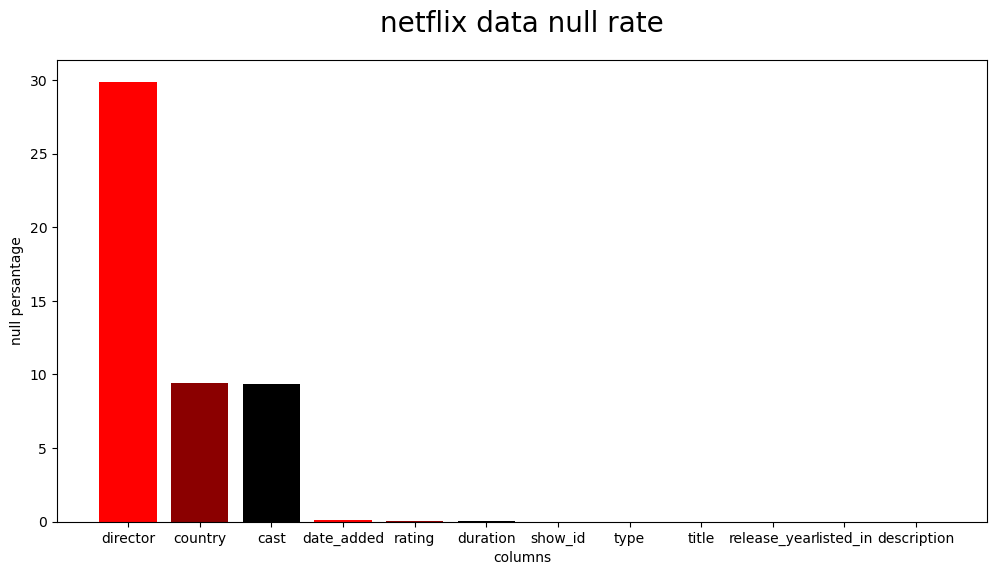

In [8]:
null_per = df.isna().sum() / len(df) * 100
null_per = null_per.sort_values(ascending = False)

color = ["red", "darkred", "black"]

fig, ax = plt.subplots(figsize = (12,6))

bar = ax.bar(null_per.index,null_per.values,color = color)

ax.set(xlabel = "columns",
       ylabel = "null persantage")
ax.set_title("netflix data null rate",fontsize = 20,pad = 20)

plt.show()

I aimed to replace the names of the months with their corresponding numerical values.

The method I applied is one possible approach; however, there may be more efficient or standardized solutions. I would appreciate learning about any alternative methods or suggestions you may have.


In [9]:
list1 = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
len(list1)

list2 = ["1,","2,","3,","4,","5,","6,","7,","8,","9,","10,","11,","12,"]
list2

for i in range(13):
    df["date_added"].replace(list1, list2,regex = True)
    df["date_added"].str.replace(",", "-", regex =True)
df["date_added"] = pd.to_datetime(df["date_added"], format = "mixed")

In [10]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
count = df["rating"].astype(str)

In [12]:
count = count.value_counts()

I created a plot here to visualize the overall distribution of movie age groups.
As observed, the highest count corresponds to the **TV-MA** age rating.


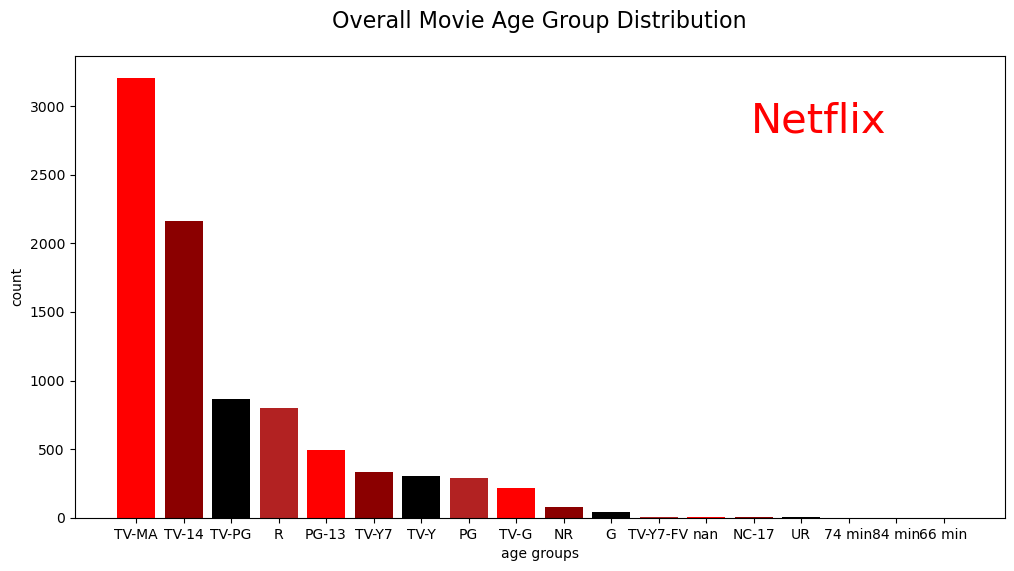

In [13]:
fig ,ax = plt.subplots(figsize = (12,6))

colors = ['red', 'darkred', 'black', 'firebrick']

bar = ax.bar(count.index,count.values,color=colors)
ax.set(
       xlabel = "age groups",
       ylabel = "count",
       )

ax.set_title("Overall Movie Age Group Distribution", fontsize=16, color='black', pad=20)

ax.text(0.8, 0.9, 'Netflix', transform=ax.transAxes, fontsize=30, color='red',
        ha='center',
        va='top')

plt.show()

In [14]:
movies = df[df["type"] == "Movie"]
tv_shows = df[df["type"] == "TV Show"]

In [15]:
x = df["type"].value_counts()

In the next plot, you can observe whether movies or TV shows constitute the majority of Netflix’s content. As evident from the plot, movies have had the highest count so far.


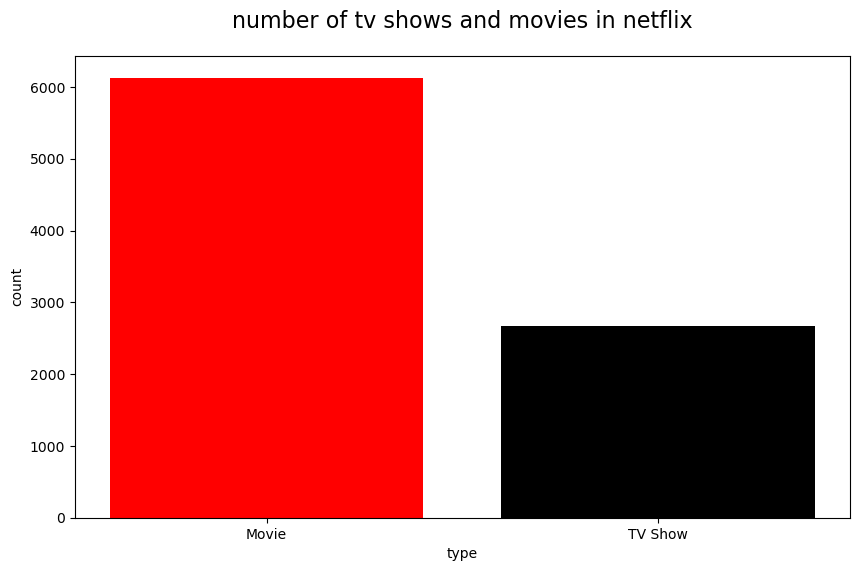

In [16]:
fig, ax = plt.subplots(figsize = (10,6))

colors = ["red", "black"]

bar = ax.bar(x.index,x.values,color =colors )

ax.set(xlabel = "type",
       ylabel = "count")

ax.set_title("number of tv shows and movies in netflix",fontsize=16, color='black', pad=20)

plt.show()

In [17]:
df["country"].isna().sum()

831

In [18]:
df_copy = df["country"].dropna()

In [19]:
len(df_copy)

7976

In [20]:
df_copy.isna().sum()

0

In [21]:
df_copy_df = pd.DataFrame(df_copy)

In [22]:
df_copy_df = df_copy_df.reset_index()
df_copy_df

,index,country
0,0,United States
1,1,South Africa
2,4,India
3,7,"United States, Ghana, Burkina Faso, United Kin..."
4,8,United Kingdom
...,...,...
7971,8801,"United Arab Emirates, Jordan"
7972,8802,United States
7973,8804,United States
7974,8805,United States


In [23]:
df_copy_df.drop("index",axis = 1, inplace = True)

In [24]:
df_copy_df

,country
0,United States
1,South Africa
2,India
3,"United States, Ghana, Burkina Faso, United Kin..."
4,United Kingdom
...,...
7971,"United Arab Emirates, Jordan"
7972,United States
7973,United States
7974,United States


In [25]:
df_copy_df = df_copy_df["country"].str.split(", ")
df_copy_df = df_copy_df.explode("country")
df_copy_df = df_copy_df.value_counts()

Now, you can see in the plot below which countries have released the most movies and TV shows on Netflix.


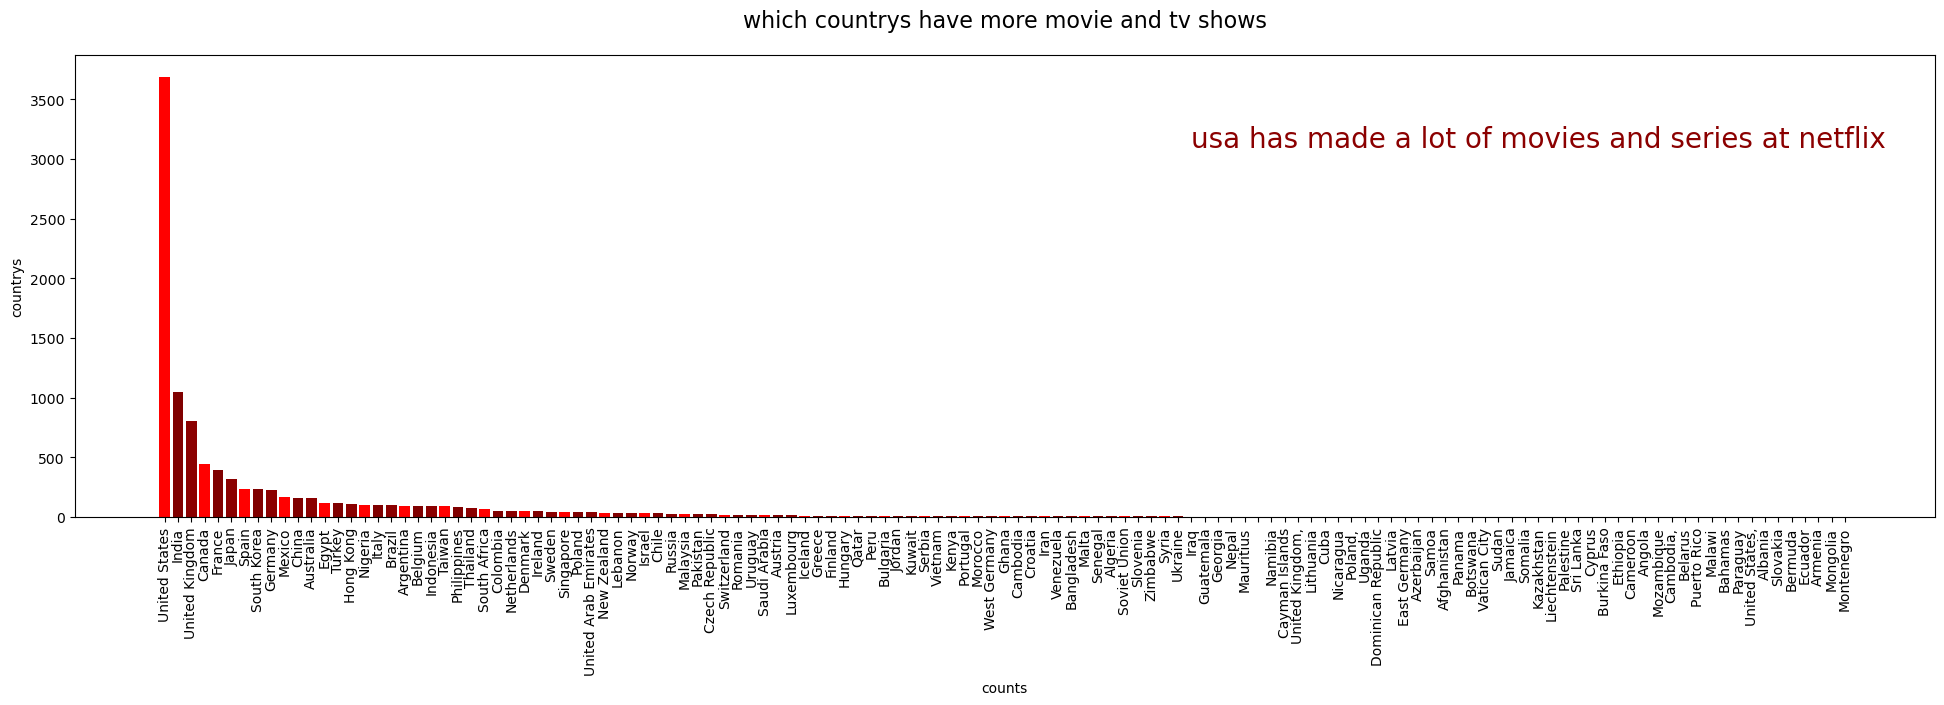

In [26]:
fig, ax = plt.subplots(figsize = (24,6))

colors = ["red", "maroon", "darkred"]

bar = ax.bar(df_copy_df.index,df_copy_df.values, color = colors)
ax.set(xlabel = "counts",
       ylabel = "countrys")

ax.set_title("which countrys have more movie and tv shows",pad = 20, fontsize = 16)

plt.xticks(rotation = 90)
plt.text(0.6, 0.8,s = "usa has made a lot of movies and series at netflix",size = 20,transform=ax.transAxes,color = "darkred")
plt.show()

Additionally, the top five countries in producing movies and TV shows on Netflix.


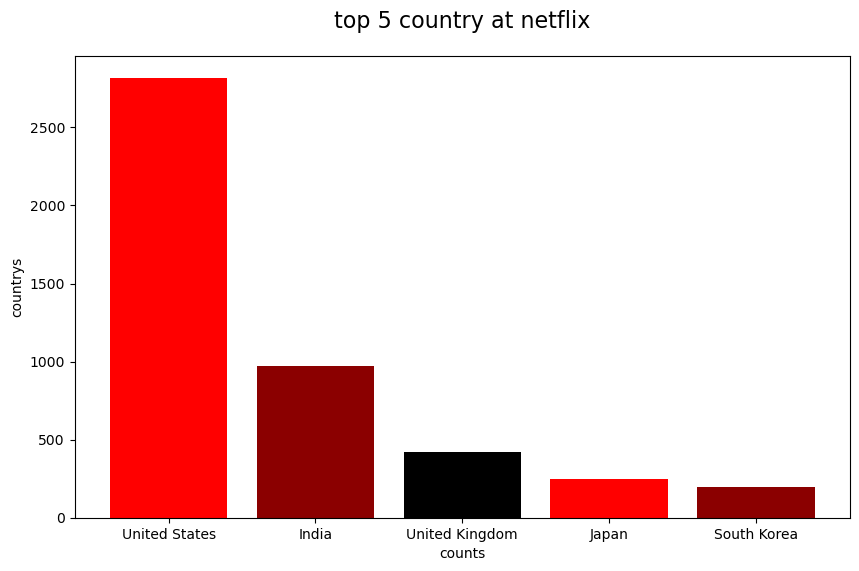

In [27]:
country = df["country"].value_counts()
country = country.head(5)

colors = ["red", "darkred", "black"]

fig, ax = plt.subplots(figsize = (10,6))

bar = plt.bar(country.index,country,color= colors)

ax.set(xlabel = "counts",
       ylabel = "countrys")

ax.set_title("top 5 country at netflix",pad = 20, fontsize = 16)

plt.show()

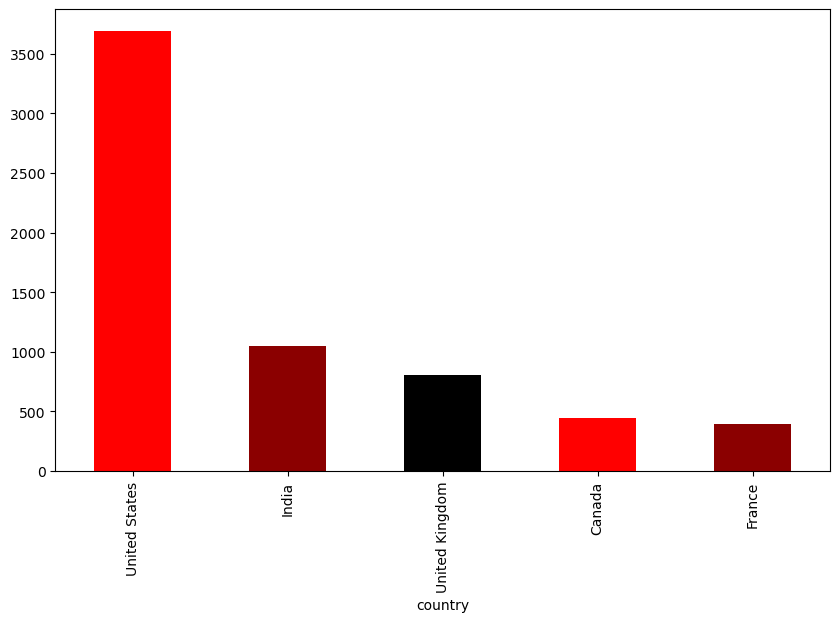

In [28]:
df_copy_df[:5].plot(kind = "bar",color = colors,figsize = (10,6));

This is the same plot as before showing which countries produce the most movies and TV shows, but with slight modifications that allow you to see the counts of series and movies for each country directly on the plot.


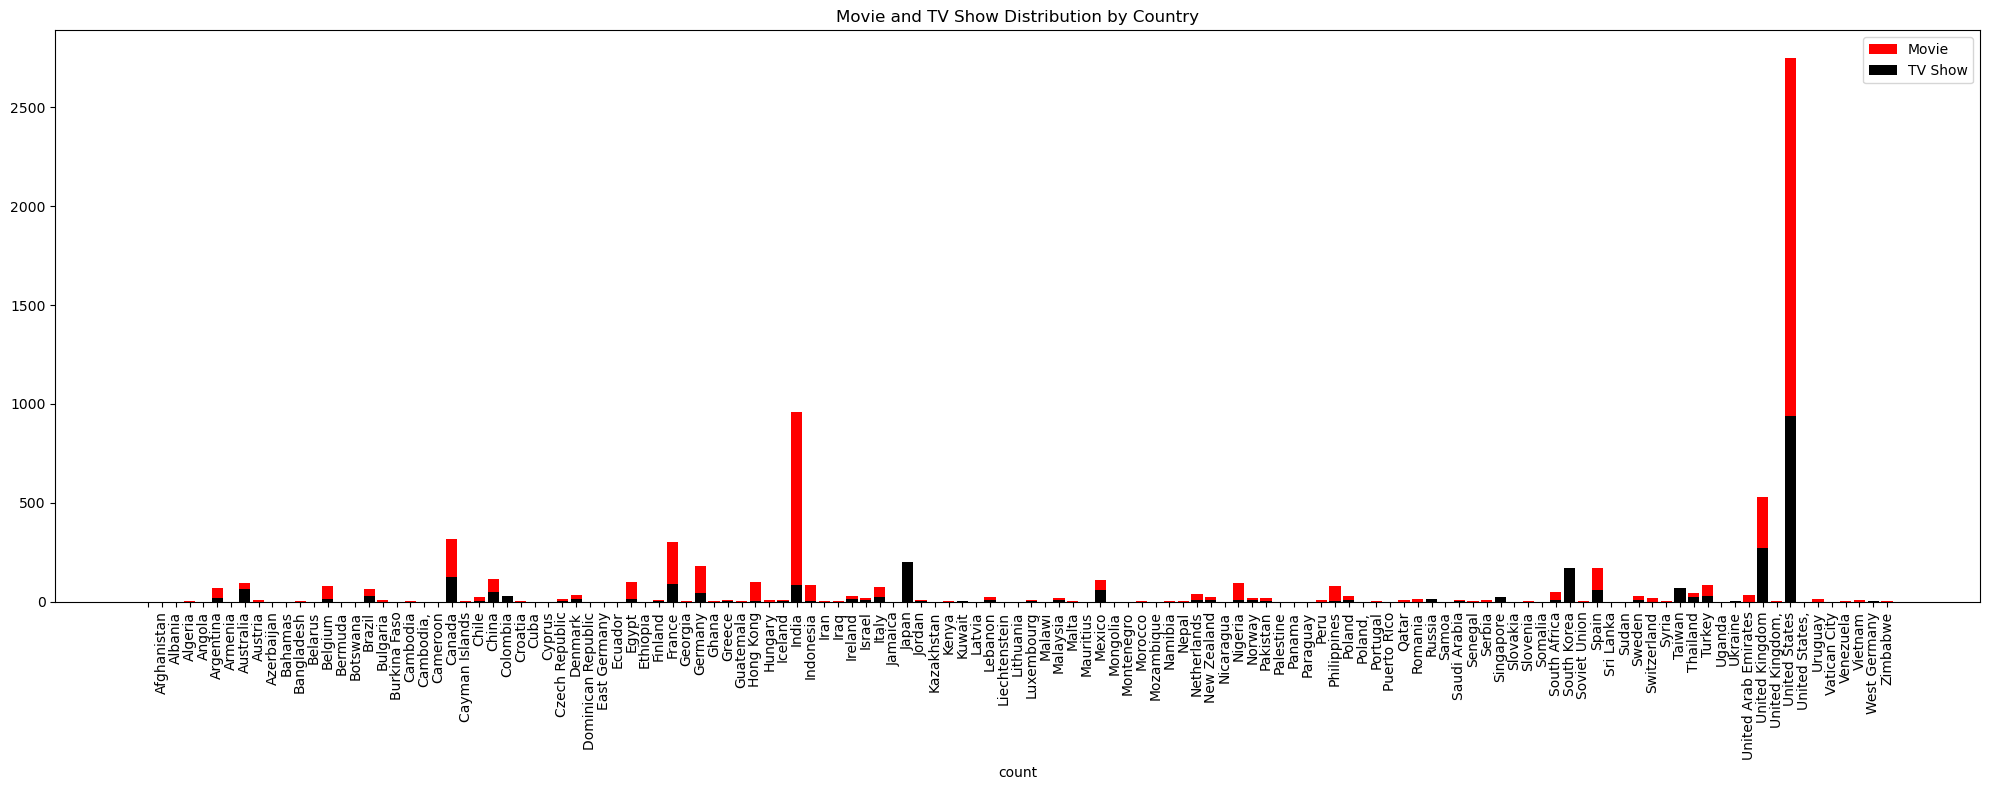

In [29]:
new_df = df[df["type"] != "Missing"].copy()

new_df["type"] = new_df["type"].str.split(", ")
new_df = new_df.explode("type")

new_df["country"] = new_df["country"].str.split(", ")
new_df = new_df.explode("country")

new_df["country"] = new_df["country"].str.strip()

movie = new_df[new_df["type"] == "Movie"]
TVshow = new_df[new_df["type"] == "TV Show"]

movie_counts = movie["country"].value_counts()
show_counts = TVshow["country"].value_counts()

all_countries = list(set(movie_counts.index).union(set(show_counts.index)))
all_countries.sort()

movie_counts = movie_counts.reindex(all_countries, fill_value=0)
show_counts = show_counts.reindex(all_countries, fill_value=0)

fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(all_countries, movie_counts.values, color='red', label='Movie')
ax.bar(all_countries, show_counts.values, color='black', label='TV Show')

ax.set_xlabel('count')
ax.set_title('Movie and TV Show Distribution by Country')
plt.xticks(rotation = 90)
ax.legend()

plt.tight_layout()
plt.show()

The same plot, but sorted version.


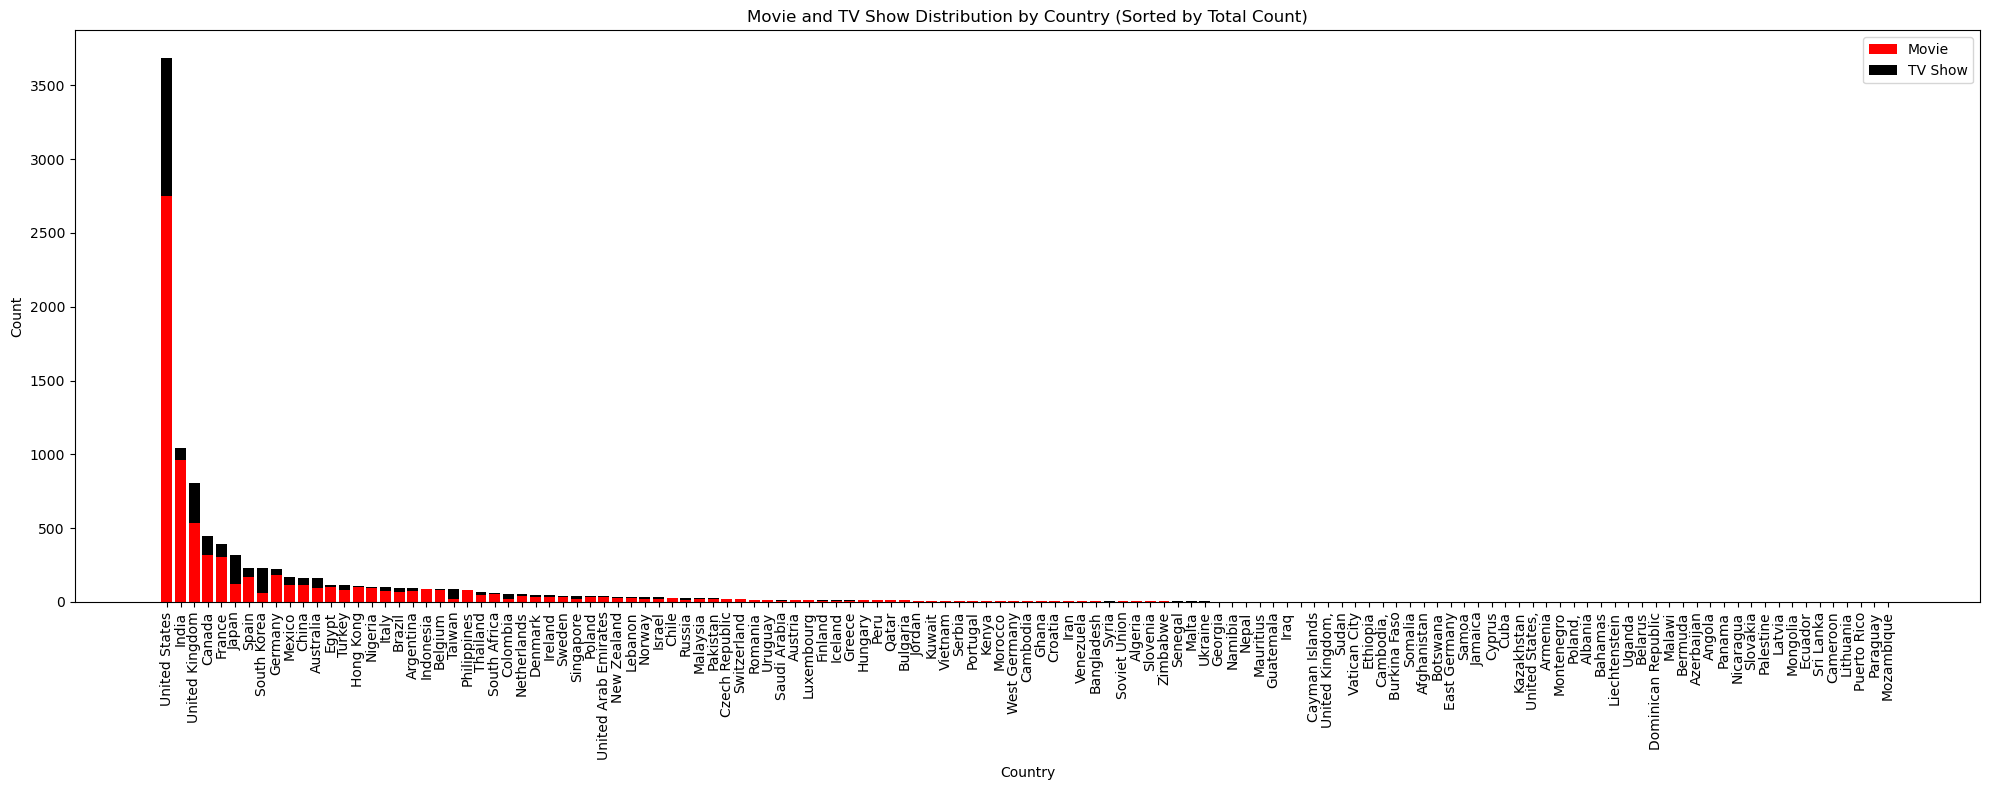

In [30]:
new_df = df[df["type"] != "Missing"].copy()

new_df["type"] = new_df["type"].str.split(", ")
new_df = new_df.explode("type")

new_df["country"] = new_df["country"].str.split(", ")
new_df = new_df.explode("country")

new_df["country"] = new_df["country"].str.strip()

movie = new_df[new_df["type"] == "Movie"]
TVshow = new_df[new_df["type"] == "TV Show"]

movie_counts = movie["country"].value_counts()
show_counts = TVshow["country"].value_counts()

all_countries = list(set(movie_counts.index).union(set(show_counts.index)))

movie_counts = movie_counts.reindex(all_countries, fill_value=0)
show_counts = show_counts.reindex(all_countries, fill_value=0)

total_counts = movie_counts + show_counts

sorted_total_counts = total_counts.sort_values(ascending=False)

movie_counts_sorted = movie_counts.reindex(sorted_total_counts.index)
show_counts_sorted = show_counts.reindex(sorted_total_counts.index)

sorted_countries = sorted_total_counts.index

fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(sorted_countries, movie_counts_sorted.values, color='red', label='Movie')
ax.bar(sorted_countries, show_counts_sorted.values, bottom=movie_counts_sorted.values, color='black', label='TV Show') # Use 'bottom' for stacking

ax.set_xlabel('Country') 
ax.set_ylabel('Count')
ax.set_title('Movie and TV Show Distribution by Country (Sorted by Total Count)')
plt.xticks(rotation = 90)
ax.legend()

plt.tight_layout()
plt.show()

Which year had the highest production of movies and TV shows? Let’s find out.


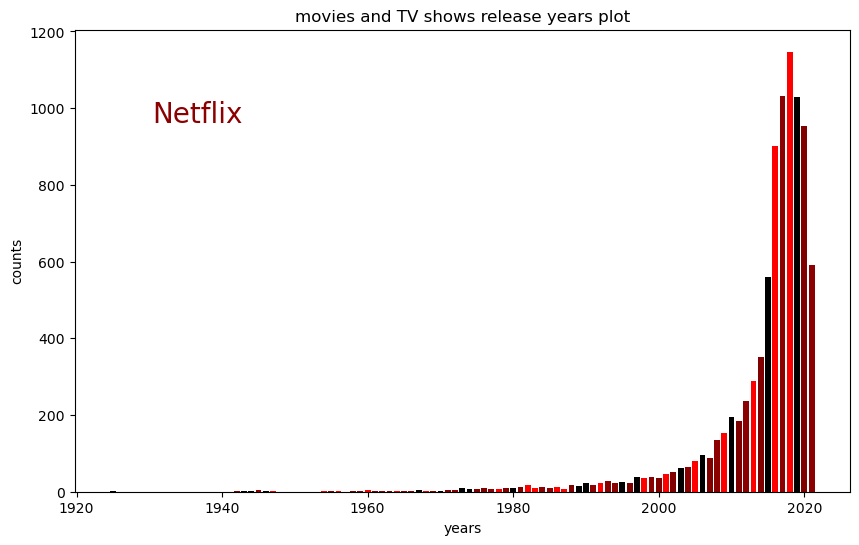

In [31]:
count = df["release_year"].value_counts()

colors = ["red", "darkred", "black", "maroon"]

fig, ax = plt.subplots(figsize = (10,6))

bar = ax.bar(count.index, count.values,
            color = colors)

ax.set(xlabel = "years",
       ylabel = "counts")

ax.set_title("movies and TV shows release years plot")
plt.text(s = "Netflix",transform=ax.transAxes,fontsize = 20, x = 0.1,y = 0.8,color = "darkred")
plt.show()


In [32]:
df["country"] = df["country"].fillna(df["country"].mode()[0])
df["country"].isna().sum()

0

In [33]:
df["cast"].replace(np.nan,"no data",inplace = True)
df["director"].replace(np.nan, "no data", inplace = True)

In [34]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [35]:
df.dropna(inplace = True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [36]:
df["month"] = df["date_added"].dt.month

In this section, I attempted to modify `ratings_ages` to make it easier to understand.


In [37]:
df["month name"] = df["date_added"].dt.month_name()

In [38]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [39]:
df["target_age"] = df["rating"].replace(ratings_ages)
df['target_age'].unique()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,month name,target_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,Teens
1,s2,TV Show,Blood & Water,no data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,Adults
3,s4,TV Show,Jailbirds New Orleans,no data,no data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,Adults
4,s5,TV Show,Kota Factory,no data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,November,Adults
8803,s8804,TV Show,Zombie Dumb,no data,no data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,July,Older Kids
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,November,Adults
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,Older Kids


In [112]:
piedata = df["type"].value_counts()
xx = pd.DataFrame(piedata)
int(xx[xx.index == "TV Show"].values)

2664

autopct='%1.1f%%'
hatch=['**O', 'oO', 'O.O', '.||.']
pctdistance=1.25


This pie chart shows the frequency distribution of movies and TV shows on Netflix. I am still working on it and learning.


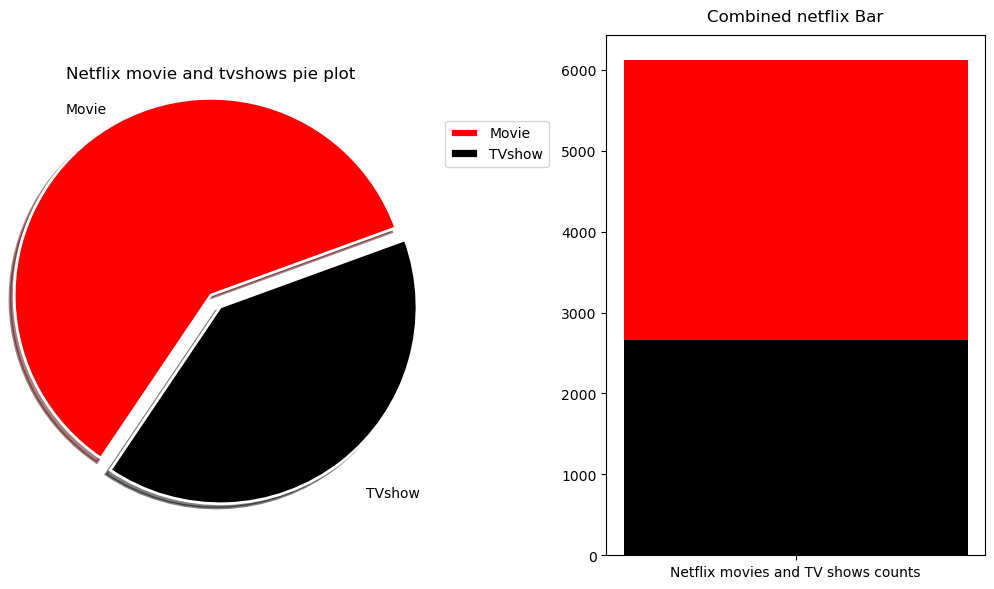

In [149]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,6))

colors = ["red","black"]
labels = ["Movie","TVshow"]
explode = (0, 0.1)
cat = ["Netflix movies and TV shows counts"]

pie = ax1.pie(piedata,radius= 1.3,center= (4,4),colors = colors, wedgeprops={"linewidth": 2, "edgecolor": "white"},
            labels = labels, labeldistance=1.2,explode=explode,startangle=20,
            shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})

ax1.set_title("Netflix movie and tvshows pie plot",pad = 20)
ax1.legend(labels, loc="center left", bbox_to_anchor=(1.1, 0.9))

bar_width = 0.05

bar1 = ax2.bar(cat, int(xx[xx.index == "Movie"].values), label='Movie', color='red',width =bar_width)
bar2 = ax2.bar(cat, int(xx[xx.index == "TV Show"].values), label='TVseries', color='black',width =bar_width)

ax2.set_title("Combined netflix Bar", pad=10)

plt.tight_layout()

#plt.subplots_adjust(wspace=1)

plt.show()